# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

## About Corn Production
### History of Corn
The most commonly accepted theory is that maize, also known as corn nowadays,  was originated in the Mesoamerican region, now called Mexico and Central America. A study by Matsuoka et al. (2002) has demonstrated that maize arose from a single domestication in Southern Mexico about 9000 years ago. The term ‘maize’ come from the word ‘mahiz’ of Taino language of the Caribbean islands, which became ‘maiz’, a word brought by Columbus from the Carribean to Spain. Domesticated corn would not exist if it was not for the humans who cultivated and developed it. The most published hypothesis about its wild progenitor : teosinte hypothesis. Teosinte provided a useful food source and ancient people cultivated it. It eventually muted into the solid ear type of maize that we know today. 

Source : [Hossain, Firoz & Muthusamy, Vignesh & Bhat, Jayant & Jha, Shailendra & Zunjare, Rajkumar & Das, Abhijit & Sarika, Konsam & Kumar, Rajesh. (2016).](https://www.researchgate.net/publication/308086213_Maize)

### How it spread worldwide and its importance in global agriculture
From Mexico maize spread north into the Southwestern United States and south down the coast to Peru. About 1000 years ago, as Indian people migrated north to the eastern woodlands of present day North America, they brought corn with them. After the discovery of the Americas, corn quickly disseminated into Europe, Asia, and Africa, and has become the leading global staple cereal in terms of annual production exceeding 1 billion metric tons. 

Source : [Olaf Erenstein & Moti Jaleta & Kai Sonder & Khondoker Mottaleb & B.M. Prasanna, 2022.
"Global maize production, consumption and trade: trends and R&D implications," Food Security: The Science, Sociology and Economics of Food Production and Access to Food, Springer;The International Society for Plant Pathology, vol. 14(5), pages 1295-1319, October.](https://link.springer.com/content/pdf/10.1007/s12571-022-01288-7.pdf)



## Getting the Data

### Installing packages

In [345]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [346]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [347]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

### Deforestation Data

In [348]:
deforest_data = pd.read_excel("./Data/Deforest.xlsx")
deforest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN


In [349]:
# Check if there is a columns only filled with 0
zero_counts = (deforest_data == 0).sum()
zero_counts.unique() #nb of unique rows only filled with 0 

array([0, 4])

In [350]:
# Define the columns containing years
year_columns = [col for col in deforest_data.columns if col.isdigit()]

# Count the number of 0 values in each row across the year columns
deforest_data['Zero_Count'] = (deforest_data[year_columns] == 0).sum(axis=1)

# Filter rows where the count of 0 values is greater than a threshold (e.g., more than 1)
countries_with_multiple_zeros = deforest_data[deforest_data['Zero_Count'] > 1]['Country Name']

# Display the country names with multiple 0 values
print(countries_with_multiple_zeros)


84     Gibraltar
149       Monaco
179        Nauru
200        Qatar
Name: Country Name, dtype: object


In [351]:
# Drop the rows where 'Country Name' is in the list of countries with multiple zeros
deforest_data = deforest_data[~deforest_data['Country Name'].isin(countries_with_multiple_zeros)]

# Drop the 'Zero_Count' column used for filtering
deforest_data = deforest_data.drop(columns=['Zero_Count'])

deforest_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [352]:
#Dropping the column that are not necessary for the analysis
data_topic = deforest_data["Indicator Name"].unique()[0]
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


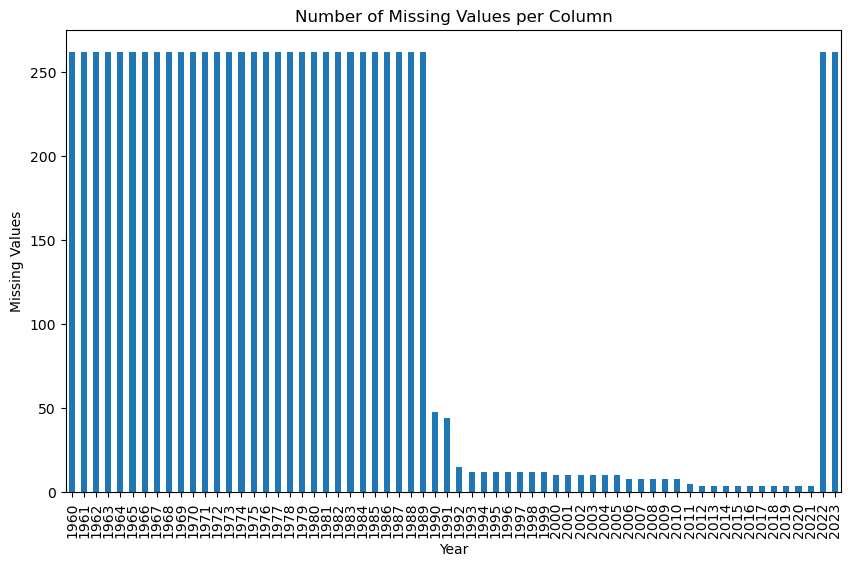

In [353]:
#Historigram to see the nb of missing values per columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()

In [354]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all missing value 
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 2000
columns_from_2000 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 2000]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_2000]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,AFE,34.717473,34.537463,34.357452,34.177441,33.654274,33.475977,33.297802,33.119504,...,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194
2,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,AFW,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,20.950393,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037
4,Angola,AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722


In [355]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


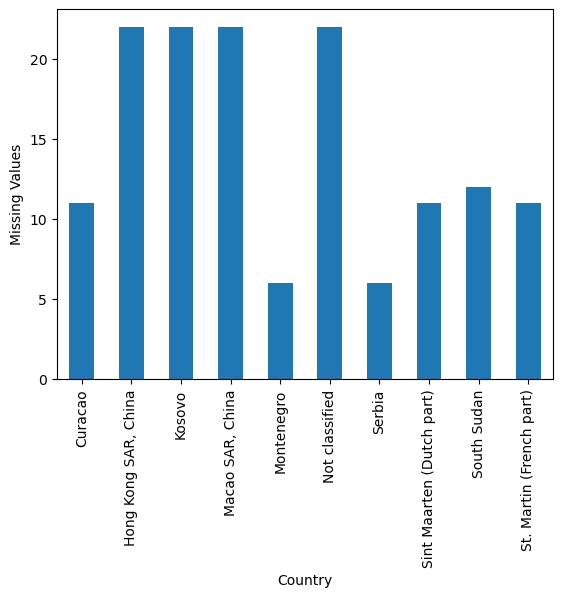

In [356]:
# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [357]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
df_cleaned.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


In [358]:
#Data availability per country
data_avl = df_cleaned.groupby("Country Name").count()["Values"].unique()[0] #Data point per country
print(f"Data point per country: {data_avl}")

Data point per country: 22


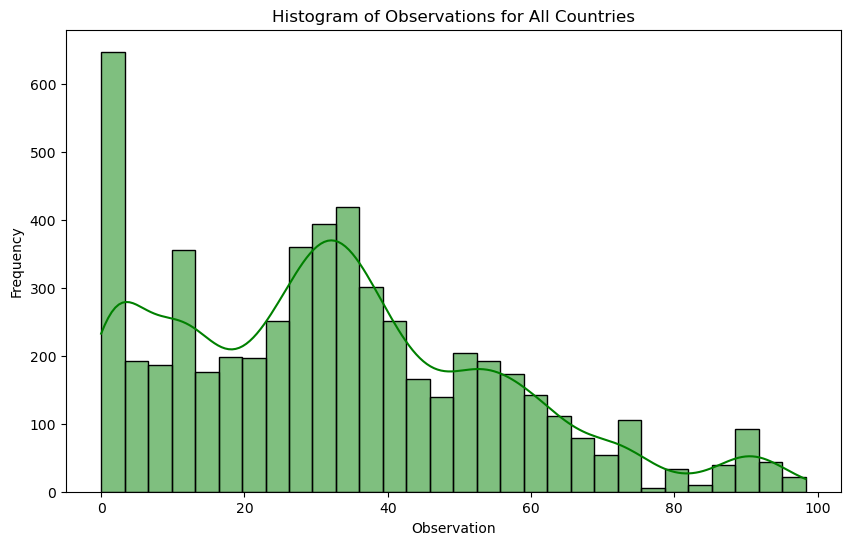

In [359]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Values"], bins=30, kde=True, color='green')
plt.title('Histogram of Observations for All Countries')
plt.xlabel('Observation')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [360]:
df_cleaned["Values"].skew()

0.5836839696069517

In [361]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [362]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)
df_cleaned

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/3388532243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Name,Country Code,Year,Values,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Africa Eastern and Southern,AFE,2000,34.717473,None
2,Afghanistan,AFG,2000,1.852782,AFG
3,Africa Western and Central,AFW,2000,21.595284,None
4,Angola,AGO,2000,62.331443,AGO
...,...,...,...,...,...
5758,Samoa,WSM,2021,57.982014,WSM
5760,"Yemen, Rep.",YEM,2021,1.039832,None
5761,South Africa,ZAF,2021,14.025085,ZAF
5762,Zambia,ZMB,2021,60.030150,ZMB


In [363]:
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3
1,Africa Eastern and Southern,AFE,2000,34.717473,None
3,Africa Western and Central,AFW,2000,21.595284,None
7,Arab World,ARB,2000,3.551072,None
23,"Bahamas, The",BHS,2000,50.935065,None
36,Central Europe and the Baltics,CEB,2000,32.469472,None
...,...,...,...,...,...
5751,St. Vincent and the Grenadines,VCT,2021,73.179487,None
5752,"Venezuela, RB",VEN,2021,52.347781,None
5754,Virgin Islands (U.S.),VIR,2021,57.314286,None
5757,World,WLD,2021,31.177049,None


In [364]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    'Macao SAR, China': 'Macao',
    'St. Martin (French part)':'Saint Martin (French part)',
    'Curacao':'Curaçao',
    'Hong Kong SAR, China': 'Hong Kong'
    # You can add more mappings if necessary
}
df_cleaned['Country Name'] = df_cleaned['Country Name'].replace(country_mapping)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/692176500.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [365]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='HKG')

# Display the country name
country.name

'Hong Kong'

In [366]:
country_not_country = [
    'Africa Eastern and Southern', 
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Eastern and Southern Africa',
    'Western and Central Africa',
    'Not classified',
    'World'
]

df_cleaned = df_cleaned[~df_cleaned['Country Name'].isin(country_not_country)]

In [367]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/1747897946.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [368]:
#Check that we have no country mismatch anymore
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3


In [369]:
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()
df_def = df_cleaned
df_def.head()

,index,Country Name,Country Code,Year,Values,iso3
0,0,Aruba,ABW,2000,2.333333,ABW
1,2,Afghanistan,AFG,2000,1.852782,AFG
2,4,Angola,AGO,2000,62.331443,AGO
3,5,Albania,ALB,2000,28.076642,ALB
4,6,Andorra,AND,2000,34.042553,AND


In [370]:
df_def.drop('index', axis=1, inplace=True)

In [371]:
df_def.rename(columns={'Values':'% of Forest Area', 'Country Name': 'country'}, inplace=True)
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


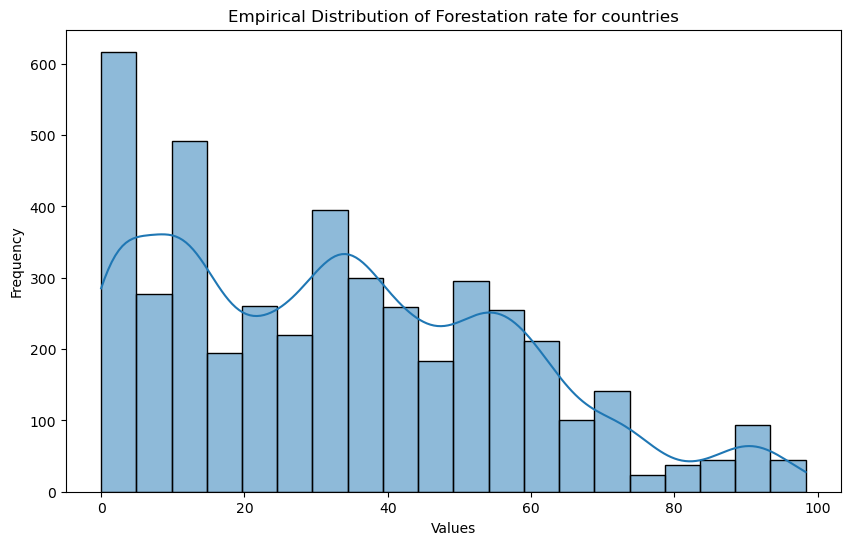

In [372]:
plt.figure(figsize=(10,6))
sns.histplot(df_def['% of Forest Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forestation rate for countries')

# Show the plot
plt.show()

In [373]:
df_def['% of Forest Area'].skew()

0.5032493738541235

In [374]:
print(df_def['Year'].min(),df_def['Year'].max())

2000 2021


### Cornfield Data

In [375]:
corn_field_data = pd.read_csv('./Data/FAOSTAT_data_en_10-2-2024.csv')
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [376]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [377]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [378]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [379]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [380]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [381]:
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [382]:
#filter only the relevant columns
df_corn = corn_field_data
df_corn = df_corn[["Area","Value","Year"]]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [383]:
areas_to_exclude = df_corn[df_corn["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
df_corn = df_corn[~df_corn['Area'].isin(areas_to_exclude)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [384]:
#Missing values
df_corn.isna().sum()

Area     0
Value    0
Year     0
dtype: int64

In [385]:
value_counts_per_area = df_corn.groupby("Area")["Value"].count()

# Filter to get only the areas where the count is not equal to 22
areas_not_equal_to_22 = value_counts_per_area[value_counts_per_area != 22].index
areas_not_equal_to_22

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Eritrea', 'Eswatini',
       'Fiji', 'French Guiana', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mauritania', 'Montenegro', 'Mozambique', 'Namibia',
       'New Caledonia', 'Nigeria', 'Oman', 'Papua New Guinea', 'Puerto Rico',
       'Rwanda', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia',
       'Serbia and Montenegro', 'Sierra Leone', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Sudan (former)', 'Sweden', 'Tajikistan', 'Thailand',
 

In [386]:
df_corn = df_corn[~df_corn["Area"].isin(areas_not_equal_to_22)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9481,Zambia,1433944,2017
9482,Zambia,1086006,2018
9483,Zambia,841693,2019
9484,Zambia,1333519,2020


In [387]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3
1057,Bolivia (Plurinational State of),307292,2000,None
1058,Bolivia (Plurinational State of),306118,2001,None
1059,Bolivia (Plurinational State of),310465,2002,None
1060,Bolivia (Plurinational State of),295509,2003,None
1061,Bolivia (Plurinational State of),313849,2004,None
...,...,...,...,...
7175,Republic of Korea,15074,2017,None
7176,Republic of Korea,15472,2018,None
7177,Republic of Korea,14840,2019,None
7178,Republic of Korea,15633,2020,None


In [388]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping_corn = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    # You can add more mappings if necessary
}

df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/1487065112.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3


In [390]:
df_corn = df_corn.reset_index()
df_corn.drop('index', axis=1, inplace=True)
df_corn.rename(columns={'Area':'country', 'Value':'Total Size Cornfield in ha'}, inplace=True)
df_corn['Total Size Cornfield in sq km'] = df_corn['Total Size Cornfield in ha']*0.01
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


### Heterogeneity variable - Land size

In [391]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()

,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [392]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]

avg_land_size_df = filtered_data
avg_land_size_df

,country,date,Land area (sq. km)
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07
5,Africa Eastern and Southern,2018,1.484512e+07
6,Africa Eastern and Southern,2017,1.484510e+07
...,...,...,...
16979,Zimbabwe,2004,3.868500e+05
16980,Zimbabwe,2003,3.868500e+05
16981,Zimbabwe,2002,3.868500e+05
16982,Zimbabwe,2001,3.868500e+05


In [393]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/1108197642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [394]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

,country,date,Land area (sq. km),iso3
2,Africa Eastern and Southern,2021,1.484509e+07,None
3,Africa Eastern and Southern,2020,1.484509e+07,None
4,Africa Eastern and Southern,2019,1.484513e+07,None
5,Africa Eastern and Southern,2018,1.484512e+07,None
6,Africa Eastern and Southern,2017,1.484510e+07,None
...,...,...,...,...
16851,"Yemen, Rep.",2004,5.279700e+05,None
16852,"Yemen, Rep.",2003,5.279700e+05,None
16853,"Yemen, Rep.",2002,5.279700e+05,None
16854,"Yemen, Rep.",2001,5.279700e+05,None


In [395]:
avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/344355826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [396]:
avg_land_size_df = avg_land_size_df[~avg_land_size_df['country'].isin(country_not_country)]

In [397]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_12926/724237593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,date,Land area (sq. km),iso3
9858,Kosovo,2021,NaN,None
9859,Kosovo,2020,NaN,None
9860,Kosovo,2019,NaN,None
9861,Kosovo,2018,NaN,None
9862,Kosovo,2017,NaN,None
9863,Kosovo,2016,NaN,None
9864,Kosovo,2015,NaN,None
9865,Kosovo,2014,NaN,None
9866,Kosovo,2013,NaN,None
9867,Kosovo,2012,NaN,None


In [398]:
avg_land_size_df = avg_land_size_df.dropna(subset=['iso3'])
avg_land_size_df.head()

,country,date,Land area (sq. km),iso3
3138,Afghanistan,2021,652230.0,AFG
3139,Afghanistan,2020,652230.0,AFG
3140,Afghanistan,2019,652230.0,AFG
3141,Afghanistan,2018,652230.0,AFG
3142,Afghanistan,2017,652230.0,AFG


In [399]:
avg_land_size_df = avg_land_size_df.reset_index()
avg_land_size_df.drop('index', axis=1, inplace=True)
avg_land_size_df.rename(columns={'Land area (sq. km)':'landArea','date':'Year'}, inplace=True)
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


### Create a table containing the x,y and heterogeneity variable

In [400]:
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


In [401]:
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


In [402]:
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


In [403]:
final_merged_df = pd.merge(avg_land_size_df, df_corn, on=['iso3', 'Year'], how='outer')
final_merged_df = pd.merge(final_merged_df, df_def, on=['iso3', 'Year'], how='outer')

final_merged_df.head()

,country_x,Year,landArea,iso3,country_y,Total Size Cornfield in ha,Total Size Cornfield in sq km,country,Country Code,% of Forest Area
0,Afghanistan,2021,652230.0,AFG,Afghanistan,139080.0,1390.80,Afghanistan,AFG,1.852782
1,Afghanistan,2020,652230.0,AFG,Afghanistan,140498.0,1404.98,Afghanistan,AFG,1.852782
2,Afghanistan,2019,652230.0,AFG,Afghanistan,94910.0,949.10,Afghanistan,AFG,1.852782
3,Afghanistan,2018,652230.0,AFG,Afghanistan,72433.0,724.33,Afghanistan,AFG,1.852782
4,Afghanistan,2017,652230.0,AFG,Afghanistan,134225.0,1342.25,Afghanistan,AFG,1.852782


In [404]:
final_merged_df.isnull().sum()

country_x                          22
Year                                0
landArea                           79
iso3                                0
country_y                        2816
Total Size Cornfield in ha       2816
Total Size Cornfield in sq km    2816
country                           286
Country Code                      286
% of Forest Area                  286
dtype: int64

In [405]:
# Check for missing values across each column and group by 'country'
missing_values_per_country = final_merged_df.groupby('country_x').apply(lambda x: x.isna().sum())

# Filter to show only countries with at least one missing value
countries_with_missing_values = missing_values_per_country[missing_values_per_country.sum(axis=1) > 0]

# Display the result
print(countries_with_missing_values)

                      country_x  Year  landArea  iso3  country_y  \
country_x                                                          
American Samoa                0     0         0     0         22   
Andorra                       0     0         0     0         22   
Antigua and Barbuda           0     0         0     0         22   
Aruba                         0     0         0     0         22   
Bahamas                       0     0         0     0         22   
...                         ...   ...       ...   ...        ...   
United Kingdom                0     0         0     0         22   
Vanuatu                       0     0         0     0         22   
Venezuela                     0     0         0     0         22   
Virgin Islands, U.S.          0     0         0     0         22   
Zimbabwe                      0     0         0     0         22   

                      Total Size Cornfield in ha  \
country_x                                          
American Sa

In [406]:
final_merged_df.drop(['country', 'country_y', 'Country Code'], axis=1, inplace=True)
final_merged_df.rename(columns={'country_x': 'Country'}, inplace=True)
final_merged_df = final_merged_df.dropna()
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782
...,...,...,...,...,...,...,...
4703,Zambia,2004,743390.0,ZMB,631000.0,6310.00,63.103889
4704,Zambia,2003,743390.0,ZMB,671000.0,6710.00,63.152047
4705,Zambia,2002,743390.0,ZMB,362787.0,3627.87,63.200204
4706,Zambia,2001,743390.0,ZMB,582000.0,5820.00,63.248362


In [407]:
final_merged_df = final_merged_df.reset_index(drop=True)
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782
...,...,...,...,...,...,...,...
1887,Zambia,2004,743390.0,ZMB,631000.0,6310.00,63.103889
1888,Zambia,2003,743390.0,ZMB,671000.0,6710.00,63.152047
1889,Zambia,2002,743390.0,ZMB,362787.0,3627.87,63.200204
1890,Zambia,2001,743390.0,ZMB,582000.0,5820.00,63.248362


In [408]:
final_merged_df['% of Cornfield Area'] =  final_merged_df['Total Size Cornfield in sq km'] / final_merged_df['landArea']*100
final_merged_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782,0.213238
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782,0.215412
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782,0.145516
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782,0.111054
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782,0.205794


In [409]:
last_df = final_merged_df

In [410]:
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782,0.213238
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782,0.215412
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782,0.145516
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782,0.111054
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782,0.205794
...,...,...,...,...,...,...,...,...
1887,Zambia,2004,743390.0,ZMB,631000.0,6310.00,63.103889,0.848814
1888,Zambia,2003,743390.0,ZMB,671000.0,6710.00,63.152047,0.902622
1889,Zambia,2002,743390.0,ZMB,362787.0,3627.87,63.200204,0.488017
1890,Zambia,2001,743390.0,ZMB,582000.0,5820.00,63.248362,0.782900


# Heterogeneity variable : Land available for corn expansion other than forests
### Why ? 
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ? 
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover : 
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops 
3. Woody crops 
4. Multiple or layered crops (Not mapped)
5. Grassland 
6. Tree-covered areas 
7. Mangroves
8. Shrub-covered areas 
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land 
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups : 
1. Countries with forest coverage higher than # Heterogeneity variable : Land available for corn expansion other than forests
### Why ? 
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ? 
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover : 
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops 
3. Woody crops 
4. Multiple or layered crops (Not mapped)
5. Grassland 
6. Tree-covered areas 
7. Mangroves
8. Shrub-covered areas 
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land 
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups : 
- Group 0 :  Countries with land suitable and available for corn expansion lower than its median
- Group 1 : Countries with land suitable and available for corn expansion higher than its median 

In [411]:
landcover_data = pd.read_csv("./Data/FAOSTAT_data_en_11-18-2024.csv")
landcover_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [412]:
landcover_data.sample(20)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
100295,LC,Land Cover,454,Malawi,5007,Area from MODIS,6977,"Shrubs and/or herbaceous vegetation, aquatic o...",2022,2022,1000 ha,97.85,E,Estimated value
166804,LC,Land Cover,768,Togo,5013,Area from WorldCover,6982,Coastal water bodies and intertidal areas,2020,2020,1000 ha,NaN,O,Missing value
56381,LC,Land Cover,231,Ethiopia,5008,Area from CCI_LC,6977,"Shrubs and/or herbaceous vegetation, aquatic o...",1999,1999,1000 ha,252.63,E,Estimated value
184158,LC,Land Cover,732,Western Sahara,5007,Area from MODIS,6974,Tree-covered areas,2019,2019,1000 ha,0.00,E,Estimated value
66760,LC,Land Cover,288,Ghana,5008,Area from CCI_LC,6981,Inland water bodies,2016,2016,1000 ha,725.53,E,Estimated value
152397,LC,Land Cover,694,Sierra Leone,5008,Area from CCI_LC,6981,Inland water bodies,2021,2021,1000 ha,47.34,E,Estimated value
9820,LC,Land Cover,36,Australia,5007,Area from MODIS,6979,Terrestrial barren land,2009,2009,1000 ha,21329.94,E,Estimated value
48817,LC,Land Cover,262,Djibouti,5008,Area from CCI_LC,6980,Permanent snow and glaciers,2015,2015,1000 ha,0.00,E,Estimated value
21890,LC,Land Cover,76,Brazil,5007,Area from MODIS,6973,Multiple or layered crops,2020,2020,1000 ha,NaN,O,Missing value
71528,LC,Land Cover,320,Guatemala,5006,Area from CGLS,6971,Herbaceous crops,2017,2017,1000 ha,3442.31,E,Estimated value


In [413]:
# Convert 'Value' from hectares to square meters
landcover_data['Value_sq_km'] = landcover_data['Value'] * 10# 1 hectare = 10,000 square meters

In [414]:
suitable_categories = ['Herbaceous Crops', 'Grassland', 'Shrubland']
suitable_land = landcover_data[landcover_data['Item'].isin(suitable_categories)]

In [415]:
hetero_var = suitable_land.groupby(by=['Area','Year'])['Value_sq_km'].sum().reset_index()

In [416]:
hetero_var['iso3'] = hetero_var['Area'].apply(get_iso3)

In [417]:
hetero_var

,Area,Year,Value_sq_km,iso3
0,Afghanistan,1992,240353.9,AFG
1,Afghanistan,1993,240354.1,AFG
2,Afghanistan,1994,240354.4,AFG
3,Afghanistan,1995,240459.6,AFG
4,Afghanistan,1996,240449.8,AFG
...,...,...,...,...
7453,Zimbabwe,2018,321344.9,ZWE
7454,Zimbabwe,2019,326326.0,ZWE
7455,Zimbabwe,2020,384579.4,ZWE
7456,Zimbabwe,2021,404391.8,ZWE


In [418]:
no_iso3 = hetero_var[hetero_var['iso3'].isnull()]
no_iso3['Area'].unique()

array(['Belgium-Luxembourg', 'Bolivia (Plurinational State of)',
       'Chagos Archipelago', 'Channel Islands', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
       'Czechoslovakia', 'Democratic Republic of the Congo',
       'Ethiopia PDR', 'Heard and McDonald Islands', 'Holy See',
       'Iran (Islamic Republic of)', 'Johnston Island',
       'Micronesia (Federated States of)', 'Midway Island',
       'Netherlands (Kingdom of the)', 'Netherlands Antilles (former)',
       'Palestine', 'Republic of Korea', 'Serbia and Montenegro',
       'Sudan (former)', 'United States Virgin Islands',
       'Venezuela (Bolivarian Republic of)', 'Wake Island',
       'Wallis and Futuna Islands'], dtype=object)

In [419]:
hetero_var.rename(columns={'Area': 'Country'}, inplace=True)

In [420]:
last_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Czechia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'France', 'Georgia',
       'Germany', 'Greece', 'Guinea', 'Hungary', 'India', 'Italy',
       'Jamaica', 'Kazakhstan', 'Kenya', 'Korea, Republic of',
       'Kyrgyz Republic', "Lao People's Democratic Republic",
       'Luxembourg', 'Malawi', 'Mali', 'Mauritius', 'Mexico', 'Moldova',
       'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'North Macedonia', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Senegal', 'Slovak Republic', 'Slovenia',
       'South Africa',

In [421]:
end_df = pd.merge(last_df,hetero_var, on=['iso3','Country', 'Year'], how='outer')
end_df = end_df[~end_df['landArea'].isnull()]
end_df['% of land available'] = (end_df['Value_sq_km']-end_df['Total Size Cornfield in sq km'])/end_df['landArea']
end_df.rename(columns={'Value_sq_km':'Total Size Land suitable for corn expansion'},inplace=True)
last_df = end_df


## EDA

In [422]:
df_avg_defrate = pd.DataFrame(last_df.groupby("Country")["% of Forest Area"].mean()).reset_index()
df_avg_defrate['iso3'] = df_avg_defrate['Country'].apply(get_iso3)
df_avg_defrate

,Country,% of Forest Area,iso3
0,Afghanistan,1.852782,AFG
1,Albania,28.530060,ALB
2,Algeria,0.775079,DZA
3,Angola,57.656586,AGO
4,Argentina,11.126458,ARG
...,...,...,...
80,Uruguay,9.939448,URY
81,Uzbekistan,7.684664,UZB
82,Viet Nam,42.833980,VNM
83,Yemen,1.039832,YEM


In [423]:
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_defrate, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='% of Forest Area',  # Average deforestation rates
                    hover_name='Country',
                    title = 'Forest Area (in %) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [424]:
df_avg_cornExpRate = pd.DataFrame(last_df.groupby("Country")["% of Cornfield Area"].mean()).reset_index()
df_avg_cornExpRate['iso3'] = df_avg_cornExpRate['Country'].apply(get_iso3)
df_avg_cornExpRate

,Country,% of Cornfield Area,iso3
0,Afghanistan,0.226100,AFG
1,Albania,1.929602,ALB
2,Algeria,0.000302,DZA
3,Angola,1.250711,AGO
4,Argentina,1.554982,ARG
...,...,...,...
80,Uruguay,0.465622,URY
81,Uzbekistan,0.086432,UZB
82,Viet Nam,3.331538,VNM
83,Yemen,0.075417,YEM


In [425]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='% of Cornfield Area',  # deforestation rates
                    hover_name='Country',
                    title = 'Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

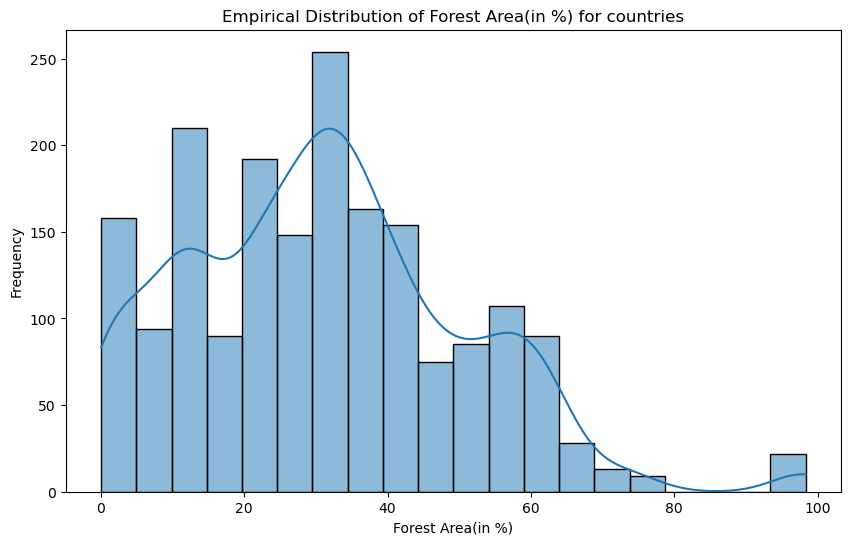

In [426]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['% of Forest Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Forest Area(in %)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forest Area(in %) for countries')

# Show the plot
plt.show()

In [427]:
last_df['% of Forest Area'].skew()

0.5489494028207405

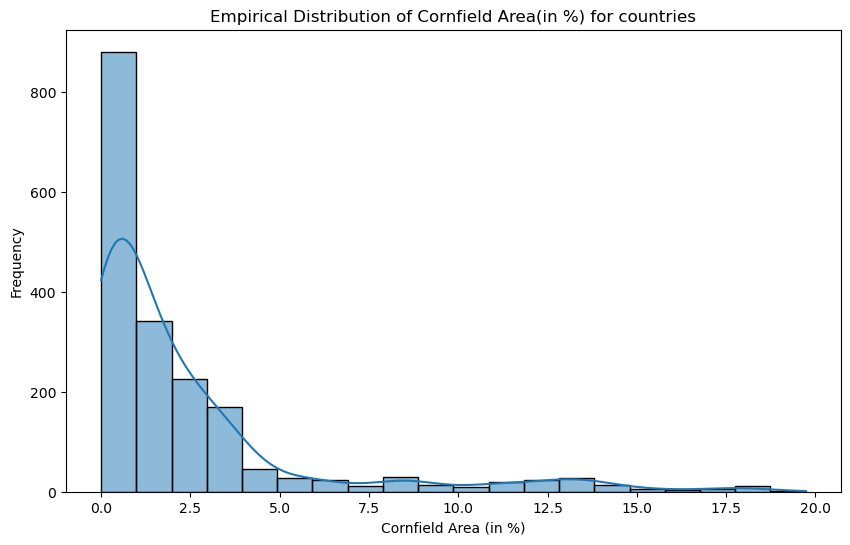

In [428]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['% of Cornfield Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Cornfield Area (in %)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Cornfield Area(in %) for countries')

# Show the plot
plt.show()

In [429]:
last_df['% of Cornfield Area'].skew()

2.4724214314155604

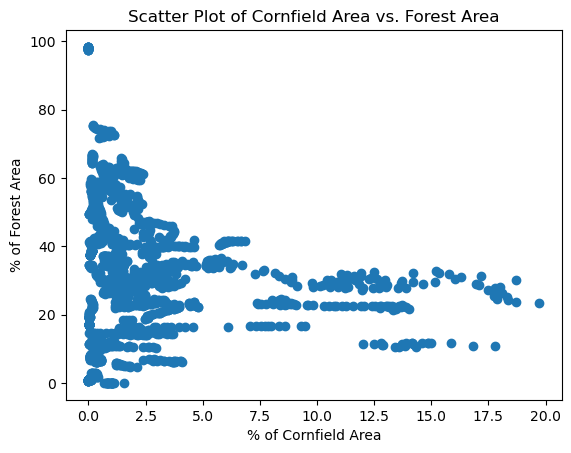

In [430]:
# Create a scatter plot
plt.scatter(last_df['% of Cornfield Area'], last_df['% of Forest Area'])

# Set the labels for the axes
plt.xlabel('% of Cornfield Area')
plt.ylabel('% of Forest Area')

# Set the title of the plot
plt.title('Scatter Plot of Cornfield Area vs. Forest Area')

# Calculate the linear regression
x = last_df['% of Cornfield Area']
y = last_df['% of Forest Area']

# Show the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



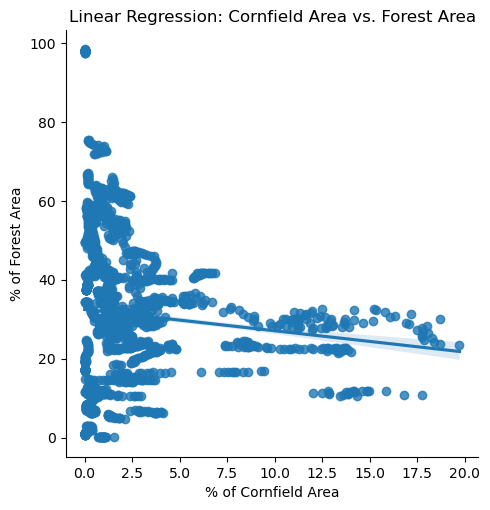

In [431]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='% of Cornfield Area', y='% of Forest Area', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Cornfield Area vs. Forest Area')

# Show the plot
plt.show()

In [432]:
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Total Size Land suitable for corn expansion,% of land available
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782,0.213238,635803.6,0.972683
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782,0.215412,631942.7,0.966741
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782,0.145516,714109.4,1.093418
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782,0.111054,709772.3,1.087113
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782,0.205794,719293.6,1.100764
...,...,...,...,...,...,...,...,...,...,...
1887,Zambia,2004,743390.0,ZMB,631000.0,6310.00,63.103889,0.848814,213844.5,0.279173
1888,Zambia,2003,743390.0,ZMB,671000.0,6710.00,63.152047,0.902622,208695.4,0.271709
1889,Zambia,2002,743390.0,ZMB,362787.0,3627.87,63.200204,0.488017,201137.1,0.265687
1890,Zambia,2001,743390.0,ZMB,582000.0,5820.00,63.248362,0.782900,177534.1,0.230988


In [433]:
# Finding the median of Land_Size
median_suitable_land_percentage = last_df['% of land available'].median()

# Creating a dummy variable for whether the land size is higher than the median
last_df['Suitable_Land_Higher_Than_Median'] = last_df['% of land available'].apply(lambda val: 1 if (val>median_suitable_land_percentage) else 0)

#median_forest_land_percentage = last_df['% of Forest Area'].median()

#last_df['Forest_Land_Higher_Than_Median'] = last_df['% of Forest Area'].apply(lambda val: 1 if (val>median_forest_land_percentage) else 0)
last_df
#Creation of the 4 groups 
#last_df['Group'] = last_df['Forest_Land_Higher_Than_Median']*2 + last_df['Suitable_Land_Higher_Than_Median'] + 1
#last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Total Size Land suitable for corn expansion,% of land available,Suitable_Land_Higher_Than_Median
0,Afghanistan,2021,652230.0,AFG,139080.0,1390.80,1.852782,0.213238,635803.6,0.972683,1
1,Afghanistan,2020,652230.0,AFG,140498.0,1404.98,1.852782,0.215412,631942.7,0.966741,1
2,Afghanistan,2019,652230.0,AFG,94910.0,949.10,1.852782,0.145516,714109.4,1.093418,1
3,Afghanistan,2018,652230.0,AFG,72433.0,724.33,1.852782,0.111054,709772.3,1.087113,1
4,Afghanistan,2017,652230.0,AFG,134225.0,1342.25,1.852782,0.205794,719293.6,1.100764,1
...,...,...,...,...,...,...,...,...,...,...,...
1887,Zambia,2004,743390.0,ZMB,631000.0,6310.00,63.103889,0.848814,213844.5,0.279173,0
1888,Zambia,2003,743390.0,ZMB,671000.0,6710.00,63.152047,0.902622,208695.4,0.271709,0
1889,Zambia,2002,743390.0,ZMB,362787.0,3627.87,63.200204,0.488017,201137.1,0.265687,0
1890,Zambia,2001,743390.0,ZMB,582000.0,5820.00,63.248362,0.782900,177534.1,0.230988,0


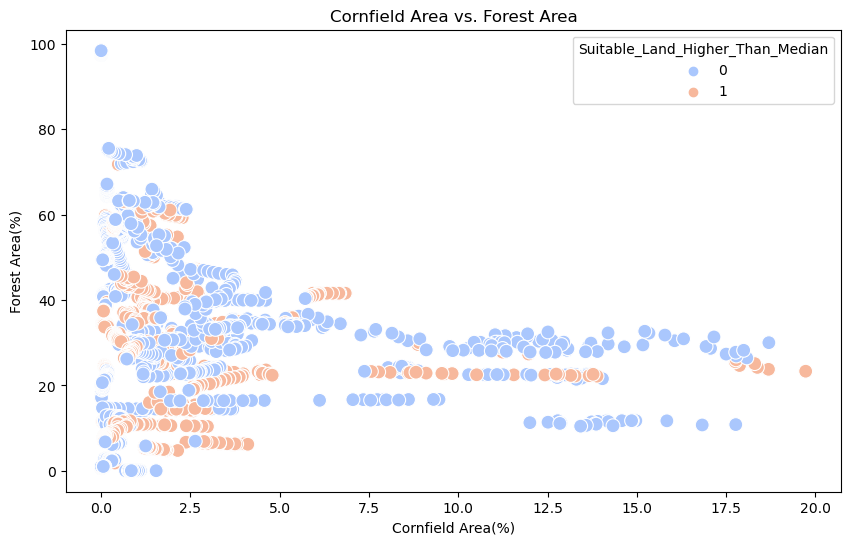

In [434]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='% of Cornfield Area', 
                y='% of Forest Area', 
                hue='Suitable_Land_Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Cornfield Area vs. Forest Area')
plt.xlabel('Cornfield Area(%)')
plt.ylabel('Forest Area(%)')

# Display the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

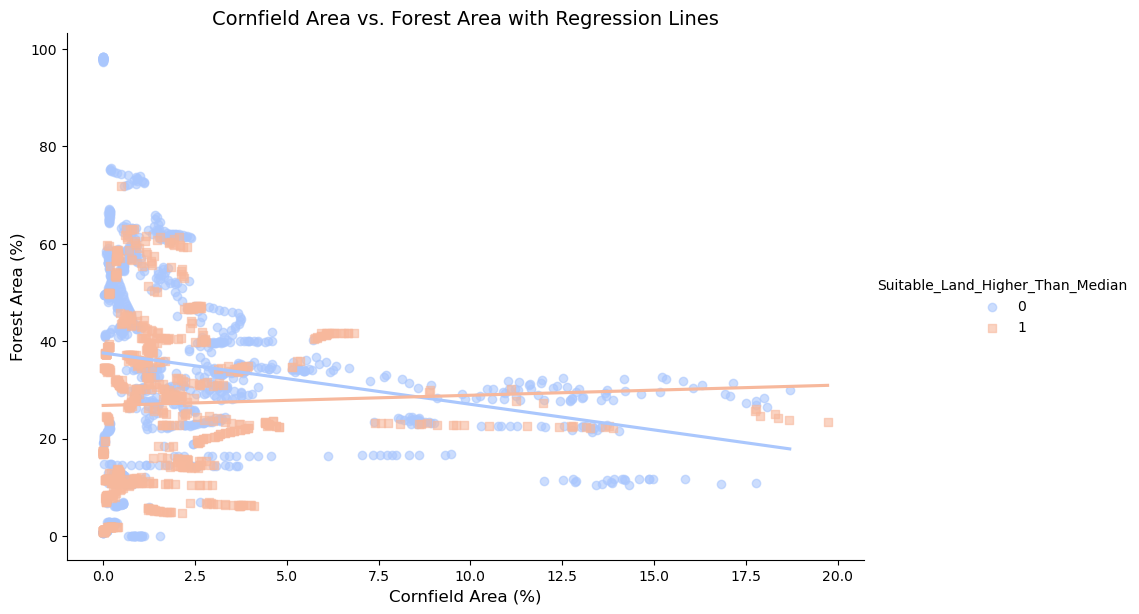

In [435]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='% of Cornfield Area',
    y='% of Forest Area',
    hue='Suitable_Land_Higher_Than_Median',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (%)', fontsize=12)
plt.ylabel('Forest Area (%)', fontsize=12)

# Show the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



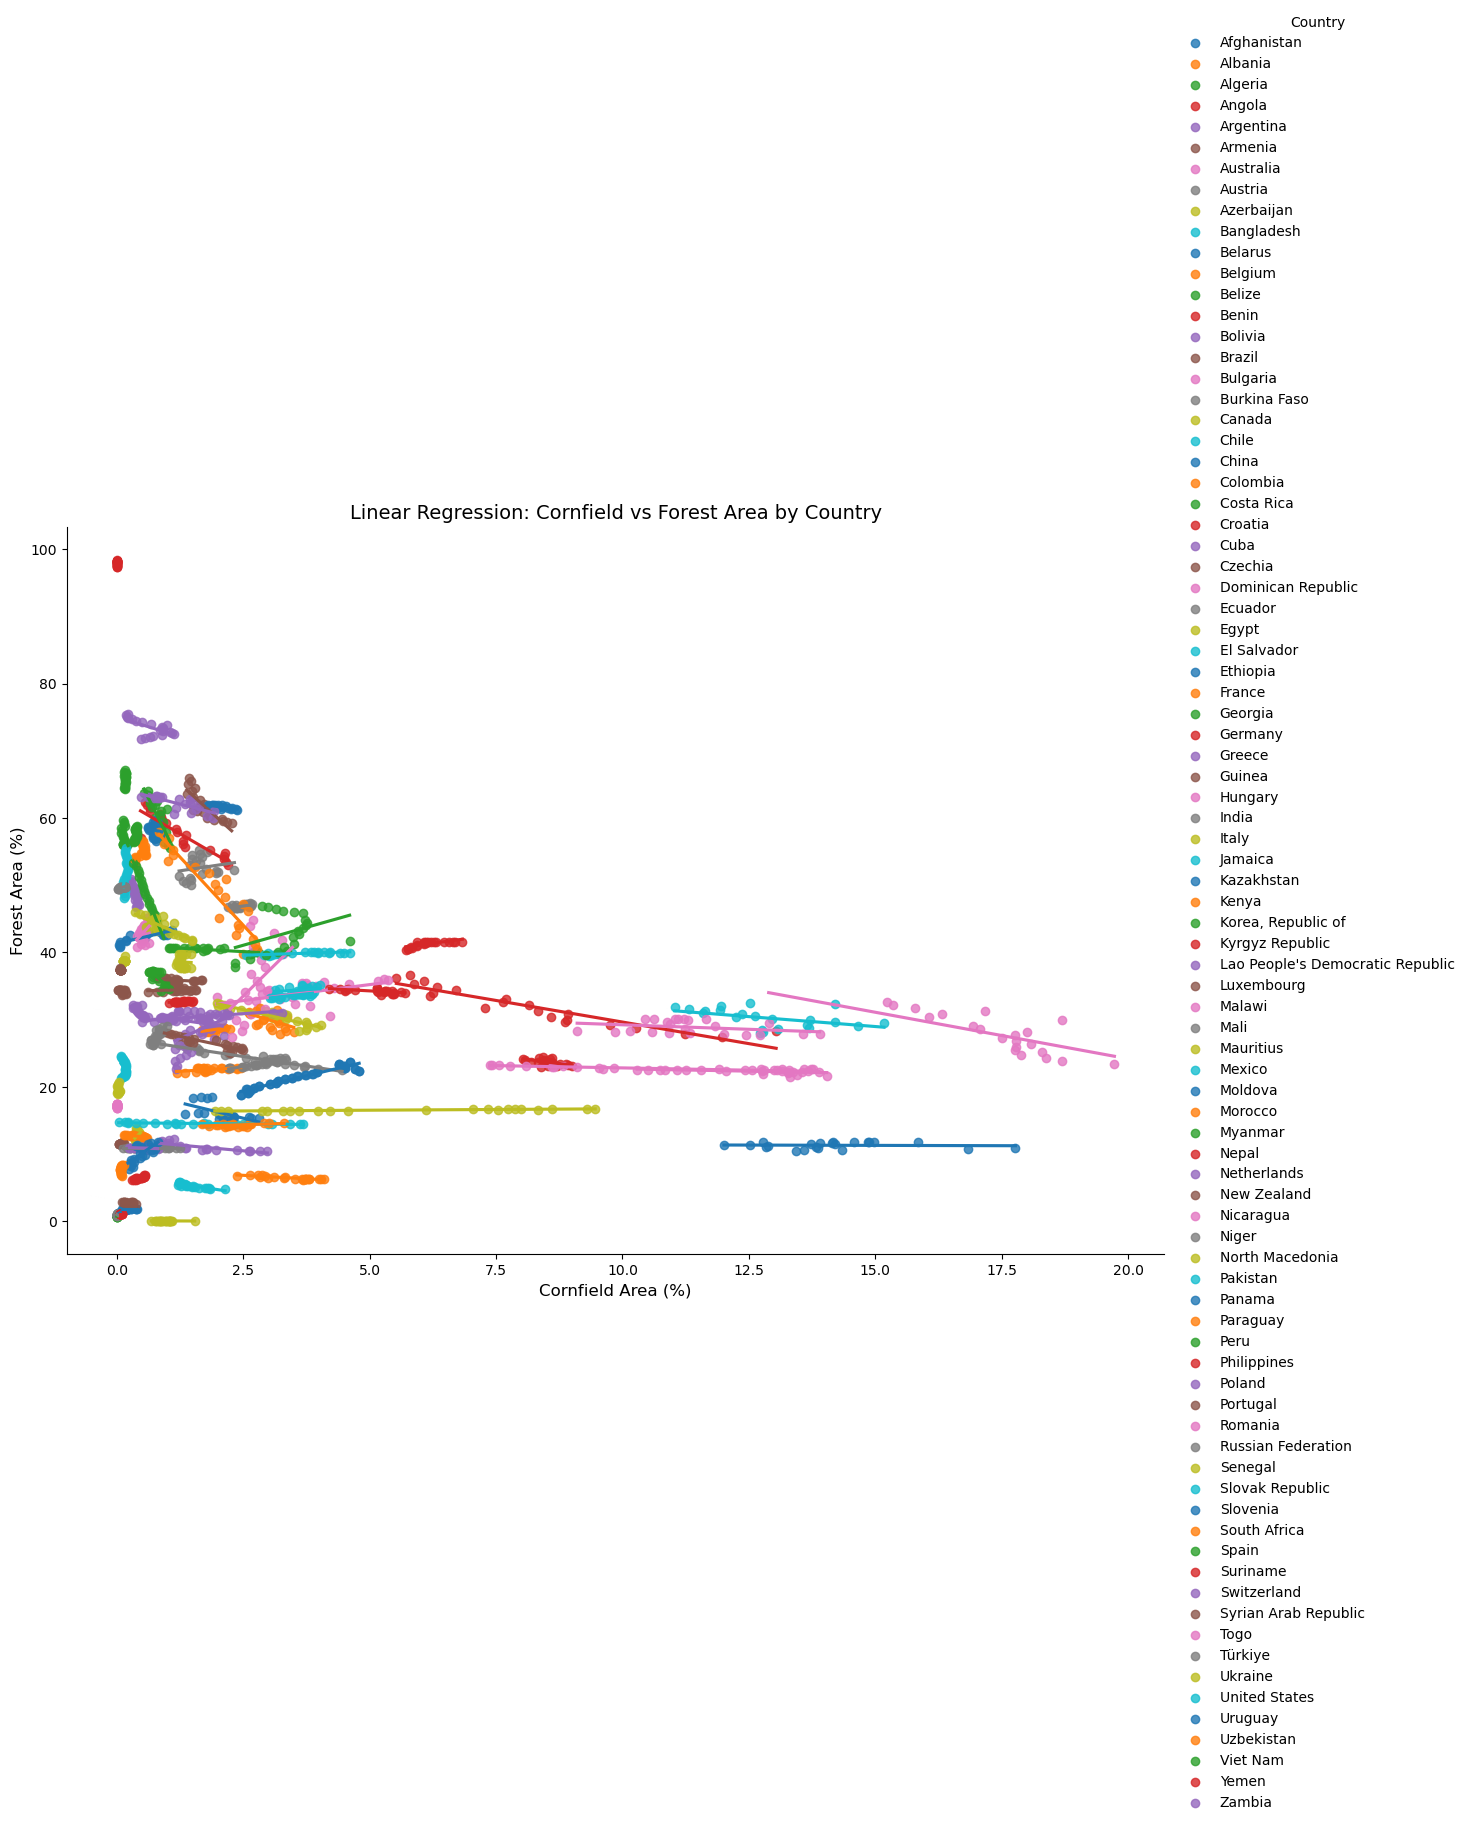

In [457]:
# Multiple linear regression lines, one for each country
sns.lmplot(
    data=last_df,
    x='% of Cornfield Area',
    y='% of Forest Area',
    hue='Country',  # Different colors for each country
    palette='tab10',  # Choose a palette
    ci=None,  # Remove confidence intervals for clarity
    height=8,  # Figure height
    aspect=1.5  # Aspect ratio
)

# Add labels and title
plt.title('Linear Regression: Cornfield vs Forest Area by Country', fontsize=14)
plt.xlabel('Cornfield Area (%)', fontsize=12)
plt.ylabel('Forest Area (%)', fontsize=12)

# Show the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



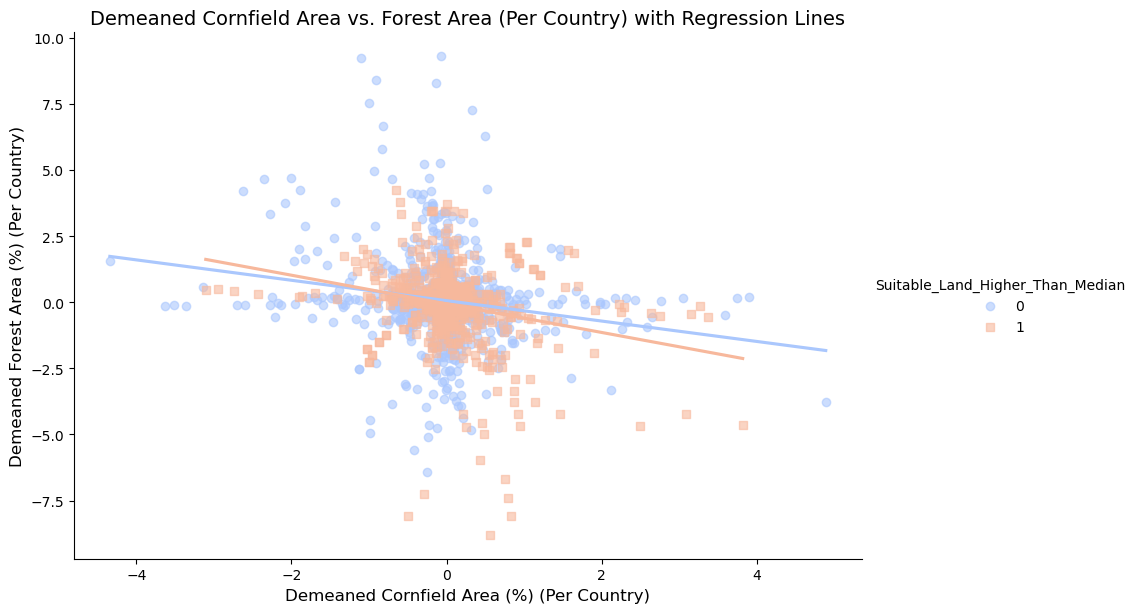

In [460]:
# Demean `% of Cornfield Area` and `% of Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('Country')['% of Cornfield Area'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('Country')['% of Forest Area'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Suitable_Land_Higher_Than_Median',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (%) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (%) (Per Country)', fontsize=12)

# Show the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



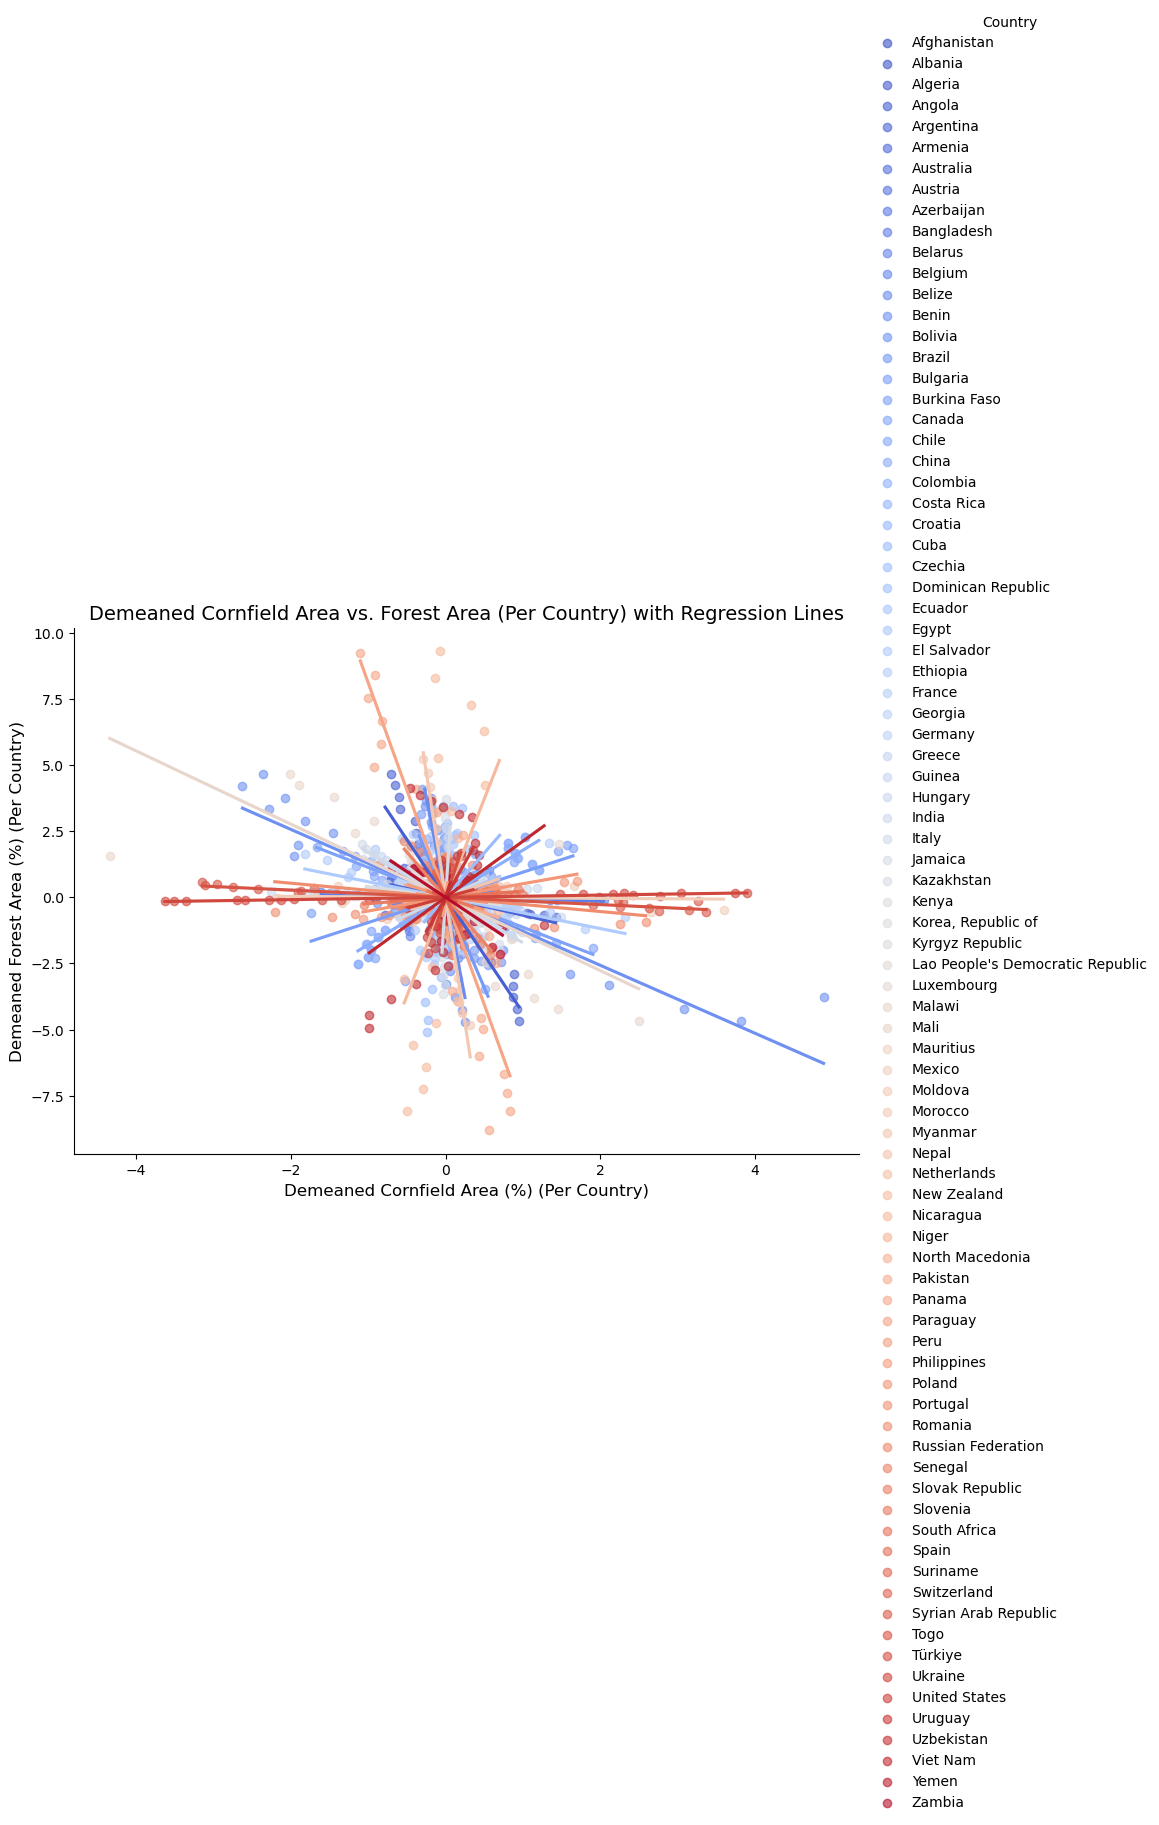

In [461]:
# Demean `% of Cornfield Area` and `% of Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('Country')['% of Cornfield Area'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('Country')['% of Forest Area'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Country',  # Group by suitability
    palette='coolwarm',
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (%) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (%) (Per Country)', fontsize=12)

# Show the plot
plt.show()

In [437]:
# correlation between cornfield area and forest area for group 0, 
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['% of Cornfield Area'].corr(group0['% of Forest Area'])

# correlation between cornfield area and forest area for group 1, 
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['% of Cornfield Area'].corr(group1['% of Forest Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: -0.20155623268557288
Correlation for Group 1: 0.033811361213534334


In [438]:
# correlation between cornfield area and forest area for group 0, 
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['Demeaned_Cornfield_Area'].corr(group0['Demeaned_Forest_Area'])

# correlation between cornfield area and forest area for group 1, 
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['Demeaned_Cornfield_Area'].corr(group1['Demeaned_Forest_Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: -0.17869143396691817
Correlation for Group 1: -0.24307930950432613


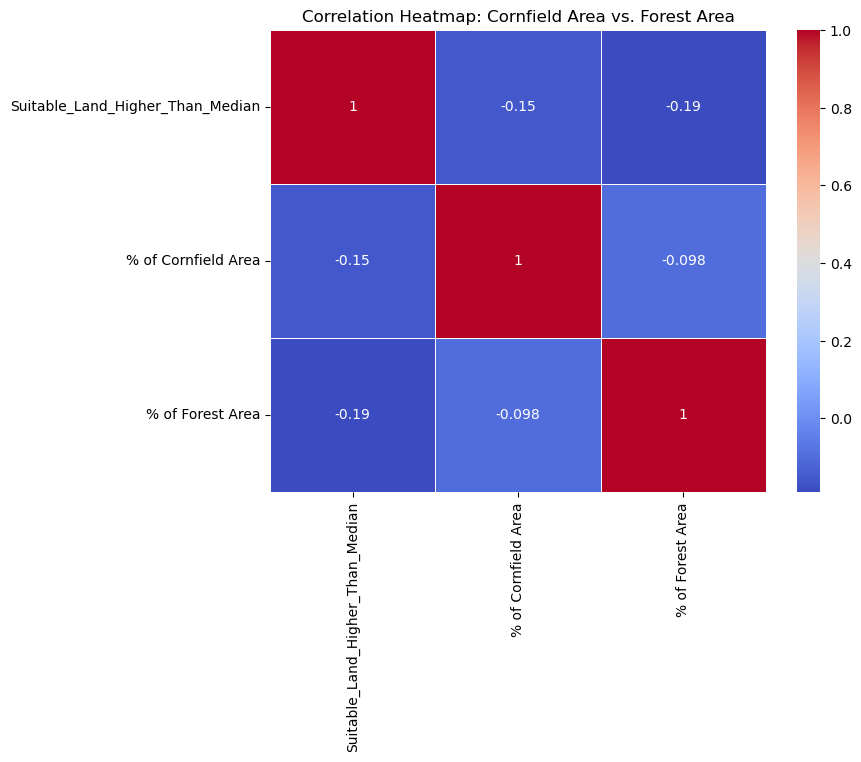

In [439]:
df_features = last_df[['Suitable_Land_Higher_Than_Median','% of Cornfield Area', '% of Forest Area']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap: Cornfield Area vs. Forest Area')
plt.show()

In [440]:
import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Cornfield Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Cornfield Area for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [441]:
fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Forest Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Forest Area for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [442]:
print(np.percentile(last_df['% of Cornfield Area'], 25), last_df['% of Cornfield Area'].median(), np.percentile(last_df['% of Cornfield Area'], 75))

0.3375503092402843 1.1494499368318132 2.794019834732456


In [443]:
print(np.percentile(last_df['% of Forest Area'], 25), last_df['% of Forest Area'].median(), np.percentile(last_df['% of Forest Area'], 75))

15.75464425556152 30.367161017787055 42.39234494095277


In [444]:
#reg for non normalized rates
import statsmodels.api as sm
X = sm.add_constant(last_df[['% of Cornfield Area']])

# Dependent variable (Y)
Y = last_df['% of Forest Area']

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     44.87
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.77e-11
Time:                        21:48:42   Log-Likelihood:                -8276.0
No. Observations:                1892   AIC:                         1.656e+04
Df Residuals:                    1890   BIC:                         1.657e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.4436      0.593     54.755      0.000      31.282      33.605
% of Cornfield Area    -0.5397      0.081     -6.699      0.000      -0.698      -0.382
==============================================================================
Omnibus:                       60.324   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.916
Skew:                           0.431   Prob(JB):                     4.86e-15
Kurtosis:                       3.307   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

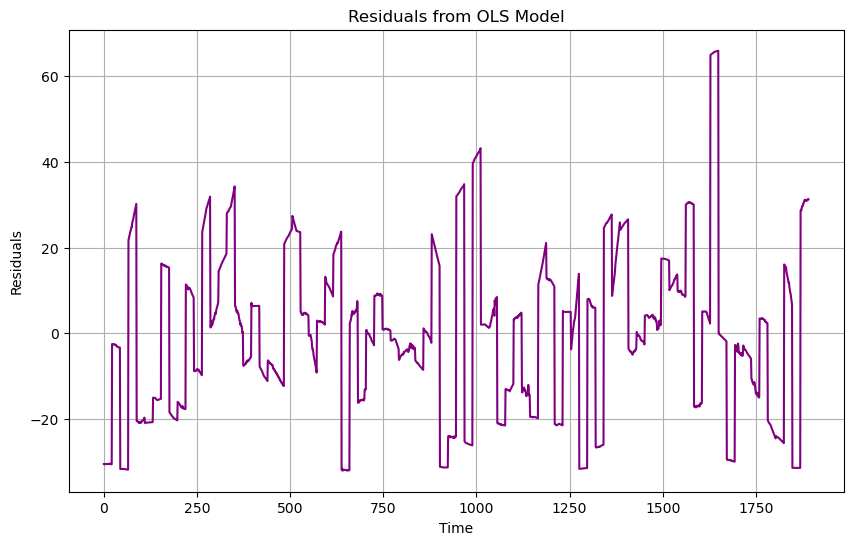

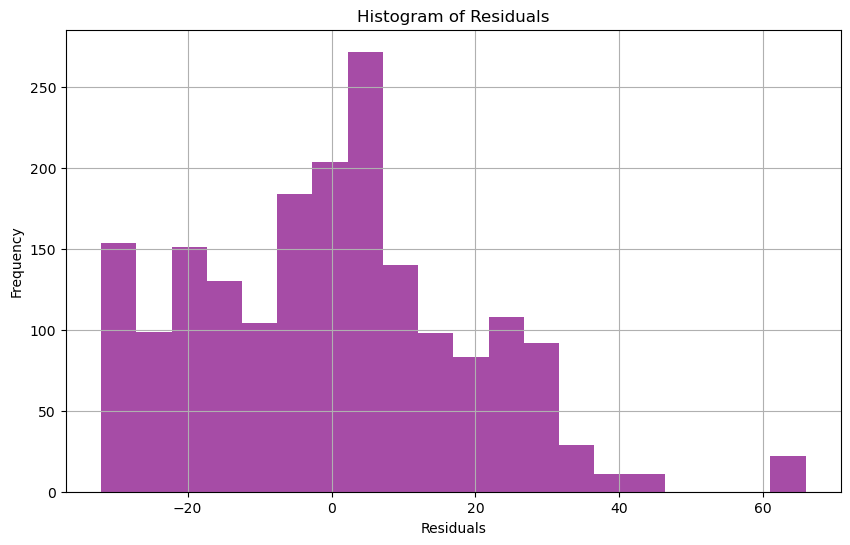

In [445]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

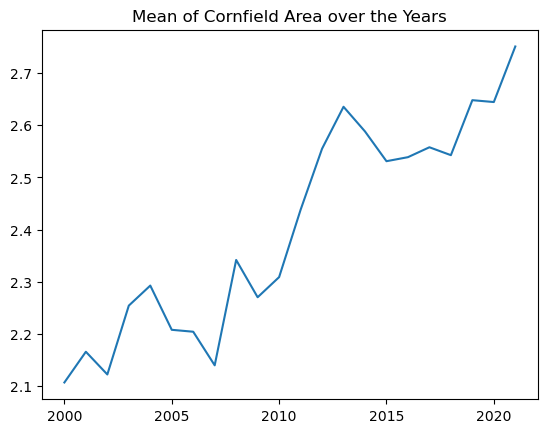

In [446]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Cornfield Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Cornfield Area'])
plt.title('Mean of Cornfield Area over the Years')
plt.show()

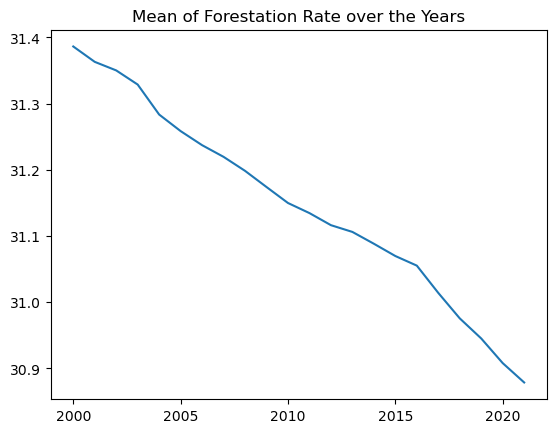

In [447]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Forest Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Forest Area'])
plt.title('Mean of Forestation Rate over the Years')
plt.show()

### Autres - tests d'autocorrélation

In [448]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

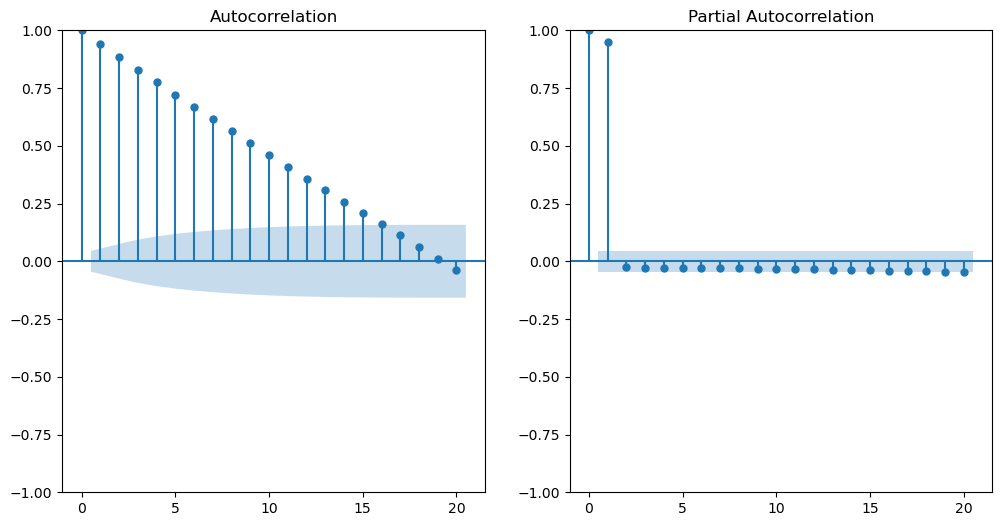

In [449]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(last_df['% of Cornfield Area'], lags=20, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(last_df['% of Forest Area'], lags=20, ax=plt.gca())  # PACF plot
plt.show()

In [450]:
aic_values = []
bic_values = []
max_lag = 20  # Maximum number of lags to test

for lag in range(1, max_lag + 1):
    model = sm.tsa.AutoReg(last_df['% of Cornfield Area'], lag).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

# Step 3: Choose the lag with the lowest AIC or BIC
optimal_lag_aic = aic_values.index(min(aic_values)) + 1
optimal_lag_bic = bic_values.index(min(bic_values)) + 1

print(f"Optimal lag based on AIC: {optimal_lag_aic}")
print(f"Optimal lag based on BIC: {optimal_lag_bic}")

Optimal lag based on AIC: 20
Optimal lag based on BIC: 1


In [451]:
print(sm.tsa.AutoReg(last_df['% of Cornfield Area'], 20).fit().aic,
sm.tsa.AutoReg(last_df['% of Cornfield Area'], 16).fit().bic)

5964.002277346853 6079.846205186846


In [452]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming 'time_series_data' is your time series
# Fit an ARIMA model (or AR, ARMA based on your needs)
model = sm.tsa.ARIMA(last_df['% of Cornfield Area'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Get the residuals from the fitted model
residuals = fitted_model.resid

# Apply the Ljung-Box test on the residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[4], return_df=True)

# Print the results
print(ljung_box_results)
print(fitted_model.summary())

    lb_stat  lb_pvalue
4  2.344459   0.672687
                                SARIMAX Results                                
Dep. Variable:     % of Cornfield Area   No. Observations:                 1892
Model:                  ARIMA(4, 0, 0)   Log Likelihood               -3012.504
Date:                 Tue, 19 Nov 2024   AIC                           6037.007
Time:                         21:48:43   BIC                           6070.279
Sample:                              0   HQIC                          6049.258
                                - 1892                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3740      0.827      2.870      0.004       0.753       3.995
ar.L1          0.9267      0.035     26.684      0.000       0.859       0.99

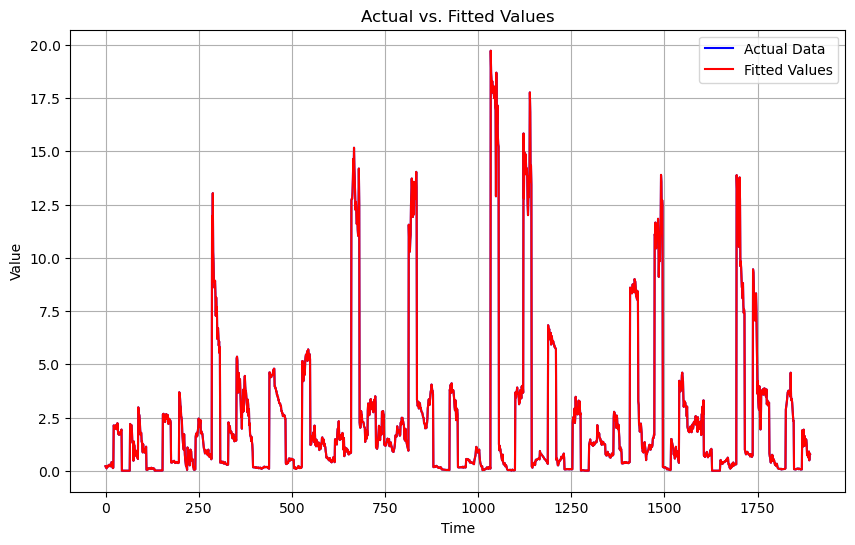

In [453]:
model = sm.tsa.ARIMA(last_df['% of Cornfield Area'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Forecast or predict the in-sample values (fitted values)
fitted_values = fitted_model.fittedvalues

# Plot the actual data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(last_df['% of Cornfield Area'], label="Actual Data", color="blue")
plt.plot(last_df['% of Cornfield Area'], label="Fitted Values", color="red")
plt.title("Actual vs. Fitted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

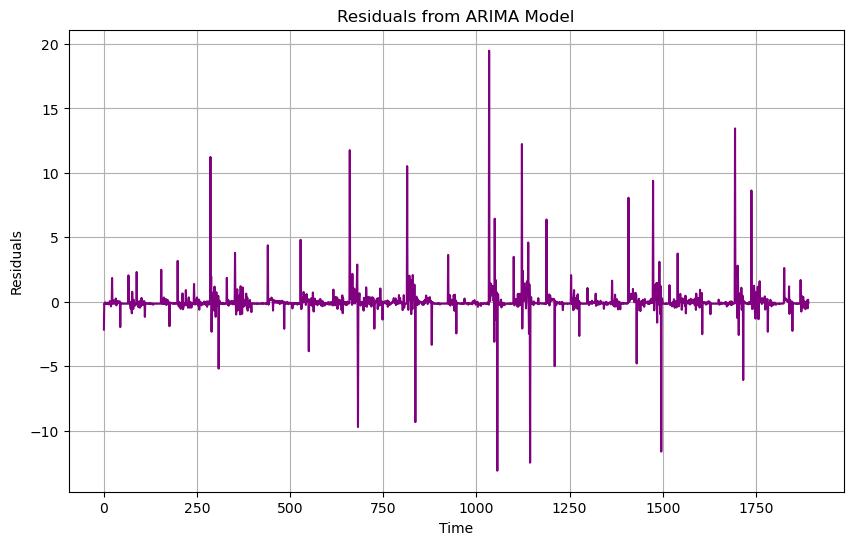

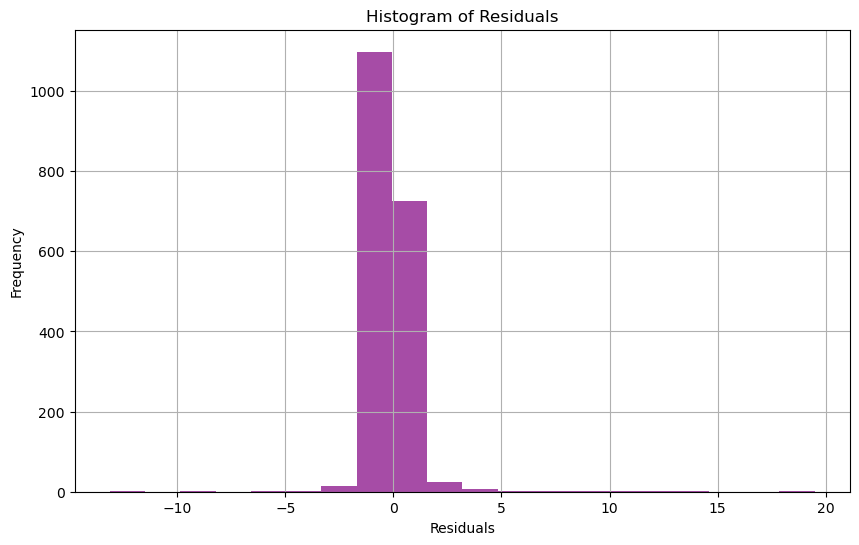

In [454]:
residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

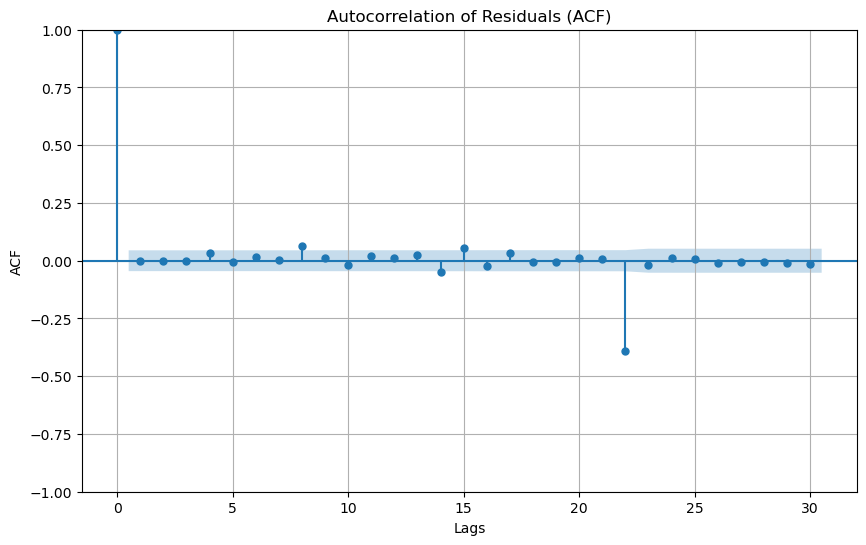

      lb_stat  lb_pvalue
10  11.260157   0.337612


In [455]:
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title("Autocorrelation of Residuals (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# Print Ljung-Box test results
print(ljung_box_results)

## Multiple Linear Regressions